In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

image 1/1 /content/drive/MyDrive/Number_Plate_Detection/dataset/images/val/Cars_524.jpg: 384x640 1 number_plate, 133.8ms
Speed: 4.8ms preprocess, 133.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict
Prediction completed! Output saved at: runs/detect/predict/Cars_524.jpg


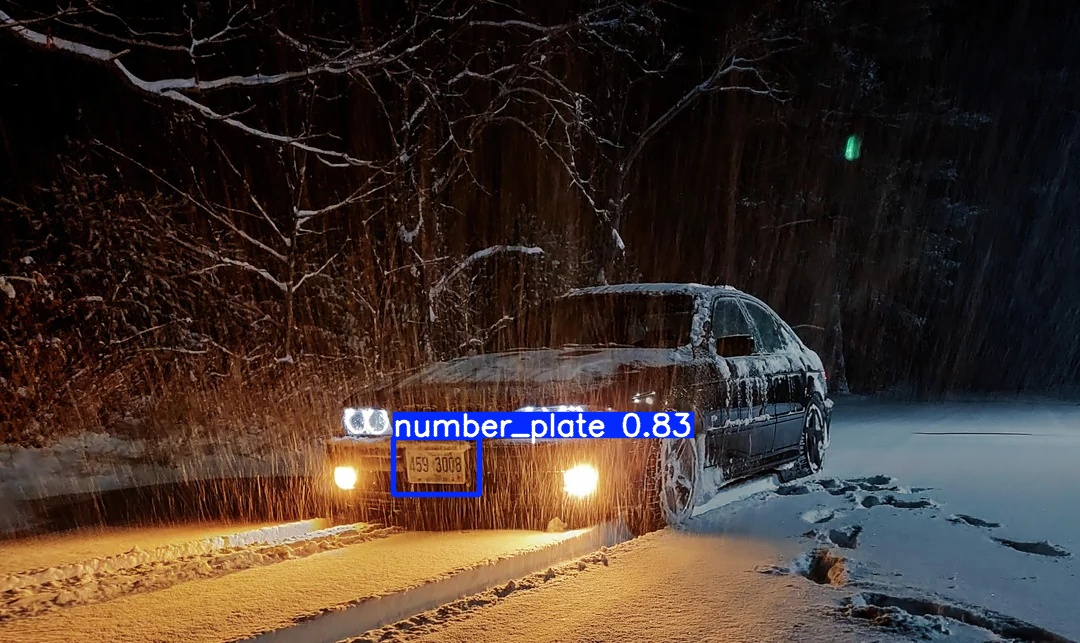

In [ ]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
import os
import shutil

# === CONFIGURATION ===
MODEL_PATH = '/content/drive/MyDrive/Number_Plate_Detection/best.pt'   # Add your trained model path over here
TEST_IMAGE_PATH = '/content/drive/MyDrive/Number_Plate_Detection/dataset/images/val/Cars_524.jpg'   # Add your image path over here 

# === CLEAN OLD PREDICTIONS ===
if os.path.exists("runs/detect/predict"):
    shutil.rmtree("runs/detect/predict")

# === LOAD MODEL ===
model = YOLO(MODEL_PATH)

# === RUN PREDICTION ===
results = model.predict(source=TEST_IMAGE_PATH, save=True)

# === DISPLAY RESULT ===
predict_folder = "runs/detect/predict/"
pred_images = [f for f in os.listdir(predict_folder) if f.endswith('.jpg') or f.endswith('.png')]

if pred_images:
    output_image_path = os.path.join(predict_folder, pred_images[0])
    print(f"Prediction completed! Output saved at: {output_image_path}")
    display(Image.open(output_image_path))
else:
    print("No output image found in predict folder.")
